In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu

# WILD WITH FATHER

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_with_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [3]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [8]:
def load_subject(subject):
    if subject == 'W8Fam':
        df_mouse = pd.read_csv(data_directory + subject + '/cells_300.csv')
    elif subject == 'W12Fam':
        df_mouse = pd.read_csv(data_directory + subject + '/cells_200.csv')    
    else:
        df_mouse = pd.read_csv(data_directory + subject + '/cells_700.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    return df_mouse

In [9]:
# # NB: Run only if file does not exist or needs to be regenerated
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
                                                                          vol=volumes, 
                                                                          level=8) for subject in subjects}
np.save('dict_results/dict_results_across_mice_WILD_with_father.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/pytho

In [10]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_with_father.npy', 
                                   allow_pickle=True).item()

In [11]:
dict_results_across_mice.keys()

dict_keys(['W10Control', 'W14Fam', 'W27Unfam', 'W16Fam', 'W38Control', 'W25Fam', 'W26Control', 'W20Unfam', 'W15Control', 'W2Unfam', 'W31Control', 'W11Unfam', 'W5Fam', 'W23Control', 'W13Unfam', 'W18Unfam', 'W7Control', 'W40Fam', 'W29Control', 'W3Control', 'W36Fam', 'W8Fam', 'W17Control', 'W34Fam'])

In [ ]:
# remove unclean data
# dict_results_across_mice.pop('W8Fam')
# dict_results_across_mice.pop('W21Unfam')
# dict_results_across_mice.pop('W33Unfam')
# dict_results_across_mice.pop('W36Fam')
# subjects.remove('W8Fam')
# subjects.remove('W21Unfam')
# subjects.remove('W33Unfam')
# subjects.remove('W36Fam')

In [12]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)


In [13]:
experimental_groups

{'Control': ['W10Control',
  'W38Control',
  'W26Control',
  'W15Control',
  'W31Control',
  'W23Control',
  'W7Control',
  'W29Control',
  'W3Control',
  'W17Control'],
 'Unfam': ['W27Unfam',
  'W20Unfam',
  'W2Unfam',
  'W11Unfam',
  'W13Unfam',
  'W18Unfam'],
 'Fam': ['W14Fam',
  'W16Fam',
  'W25Fam',
  'W5Fam',
  'W40Fam',
  'W36Fam',
  'W8Fam',
  'W34Fam']}

## Calculate number of cells

In [14]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [15]:
df_ttest_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.871948,0.769576,0.711267
1,Primary motor area,0.645156,0.448312,0.553279
2,Secondary motor area,0.173022,0.331014,0.783482
3,Primary somatosensory area,0.834991,0.881919,0.605372
4,Supplemental somatosensory area,0.918086,0.729318,0.731627
...,...,...,...,...
194,Interfascicular nucleus raphe,0.294005,0.630577,0.218176
195,Interpeduncular nucleus,0.587059,0.443108,0.200083
196,Rostral linear nucleus raphe,0.696698,0.742379,0.538614
197,Central linear nucleus raphe,0.882954,0.323637,0.308206


In [16]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [17]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Posterior amygdalar nucleus,0.00143046
Septofimbrial nucleus,0.00144065
Lateral visual area,0.00491142
Ventral premammillary nucleus,0.0145441
Intergeniculate leaflet of the lateral geniculate complex,0.0309061
Posterior auditory area,0.0328714
Ventral part of the lateral geniculate complex,0.0344693
Magnocellular nucleus,0.0427969
Parastrial nucleus,0.050606


In [18]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Posterior amygdalar nucleus,1.39982e-05
Ventral premammillary nucleus,0.0013589
Medial amygdalar nucleus,0.00246607
Intercalated amygdalar nucleus,0.00640488
Cortical amygdalar area,0.00764528
Claustrum,0.0129568
Basolateral amygdalar nucleus,0.014915
Preparasubthalamic nucleus,0.0249905
Postpiriform transition area,0.0260149


In [19]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Ammon's horn,0.00595522
Anteromedial visual area,0.0176173
Subiculum,0.0241798
Nucleus accumbens,0.0283367
Central amygdalar nucleus,0.0319597
Preparasubthalamic nucleus,0.0333461
Medial amygdalar nucleus,0.0366126
Anterior olfactory nucleus,0.0423906
Agranular insular area,0.0509248


## Calculate corr matrices on number of cells

In [20]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

Text(0.5, 1.0, 'CONTROL')

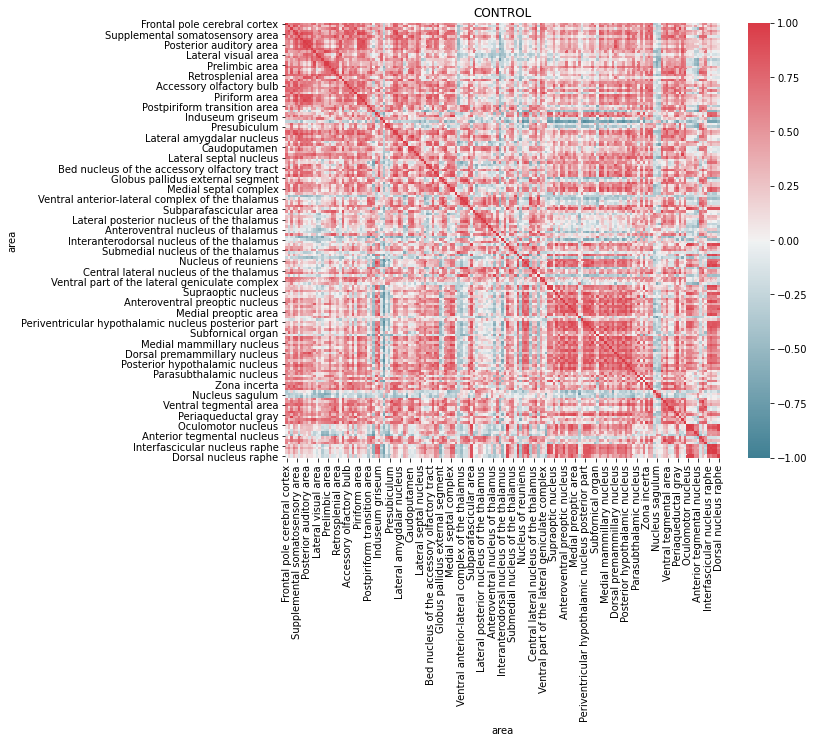

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

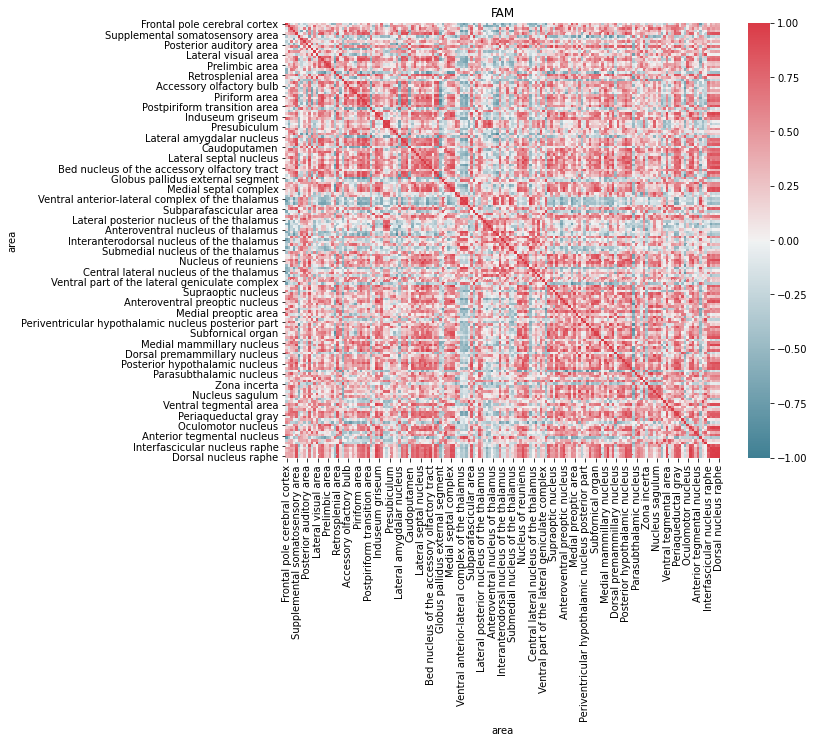

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

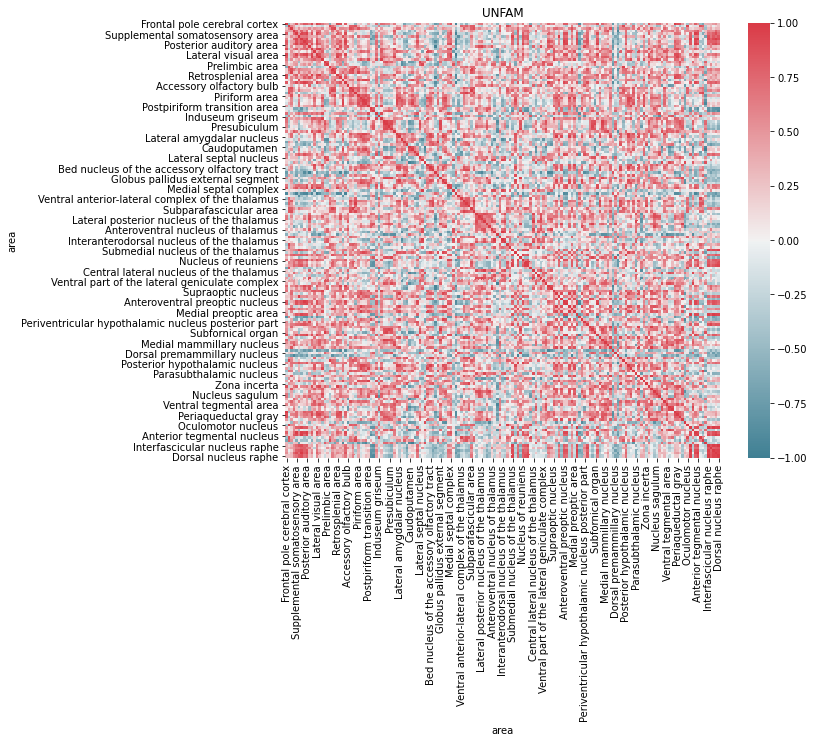

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# WILD without father

In [24]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_without_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [25]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [26]:
# # NB: Run only if file does not exist or needs to be regenerated
# dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
#                                                                           vol=volumes, 
#                                                                           level=8) for subject in subjects}
# np.save('dict_results/dict_results_across_mice_WILD_without_father.npy', dict_results_across_mice)

In [28]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_without_father.npy', allow_pickle=True).item()

In [29]:
dict_results_across_mice.keys()

dict_keys(['W12Fam', 'W10Control', 'W6Unfam', 'W38Control', 'W26Control', 'W9Fam', 'W15Control', 'W31Control', 'W30Fam', 'W24Unfam', 'W23Control', 'W7Control', 'W35Unfam', 'W4Unfam', 'W32Fam', 'W1Fam', 'W29Control', 'W3Control', 'W28Unfam', 'W39Unfam', 'W22Fam', 'W17Control', 'W37Unfam'])

In [30]:
# remove unclean data
dict_results_across_mice.pop('W35Unfam')
subjects.remove('W35Unfam')

In [31]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)


In [32]:
experimental_groups

{'Control': ['W10Control',
  'W38Control',
  'W26Control',
  'W15Control',
  'W31Control',
  'W23Control',
  'W7Control',
  'W29Control',
  'W3Control',
  'W17Control'],
 'Unfam': ['W6Unfam',
  'W24Unfam',
  'W4Unfam',
  'W28Unfam',
  'W39Unfam',
  'W37Unfam'],
 'Fam': ['W12Fam', 'W9Fam', 'W30Fam', 'W32Fam', 'W1Fam', 'W22Fam']}

# Calculate number of cells

In [33]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [34]:
df_ttest_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.478756,0.480848,0.960058
1,Primary motor area,0.401944,0.179197,0.600698
2,Secondary motor area,0.484106,0.753554,0.329099
3,Primary somatosensory area,0.33412,0.435309,0.76982
4,Supplemental somatosensory area,0.410187,0.407847,0.911828
...,...,...,...,...
194,Interfascicular nucleus raphe,0.77827,0.919029,0.840597
195,Interpeduncular nucleus,0.705173,0.97061,0.612997
196,Rostral linear nucleus raphe,0.881878,0.78551,0.603719
197,Central linear nucleus raphe,0.79771,0.362194,0.283665


In [35]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [36]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Posterior amygdalar nucleus,0.00154869
Basolateral amygdalar nucleus,0.00334011
Intercalated amygdalar nucleus,0.0046868
Preparasubthalamic nucleus,0.00561464
Medial amygdalar nucleus,0.00578217
Entorhinal area,0.0165066
Cortical amygdalar area,0.0253455
Visceral area,0.0272062
Anterodorsal preoptic nucleus,0.0320963


In [37]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Postpiriform transition area,0.00208456
Subgeniculate nucleus,0.0174627
Piriform-amygdalar area,0.0202158
Ventral part of the lateral geniculate complex,0.0240138
Agranular insular area,0.0285716
Visceral area,0.0387011
Perirhinal area,0.0401983
Olfactory tubercle,0.0440042
Dentate gyrus,0.0531798


In [38]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Posterior limiting nucleus of the thalamus,0.0136153
Medial amygdalar nucleus,0.0247707
Anterior olfactory nucleus,0.0300859
Ventral part of the lateral geniculate complex,0.0334829
Dorsal nucleus raphe,0.0361678
Dentate gyrus,0.0400909
Zona incerta,0.0500583
Posterior amygdalar nucleus,0.0513896
Intercalated amygdalar nucleus,0.0658817


# Calculate corr matrices on number of cells

In [39]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

Text(0.5, 1.0, 'CONTROL')

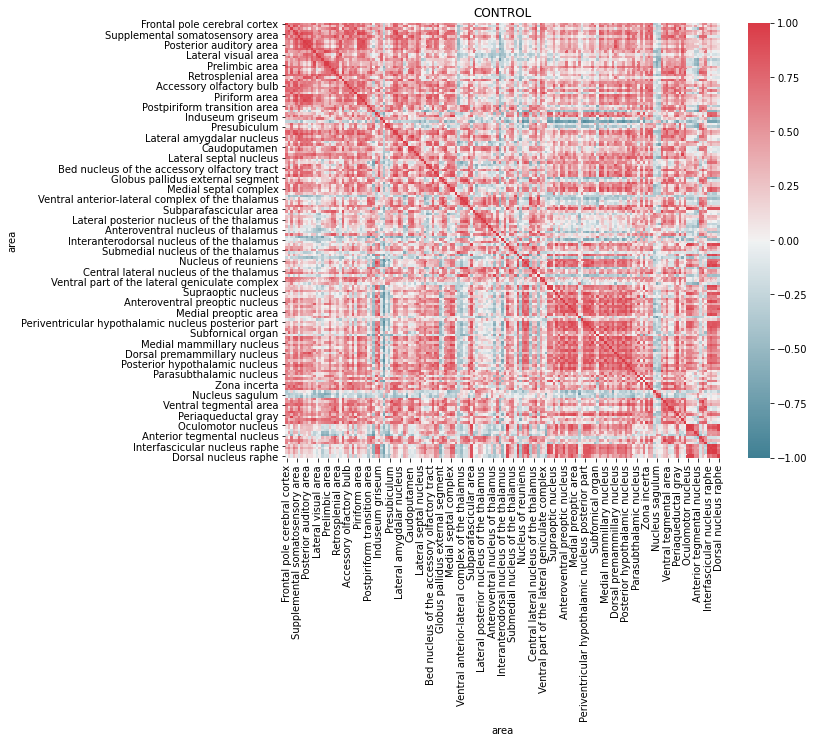

In [40]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

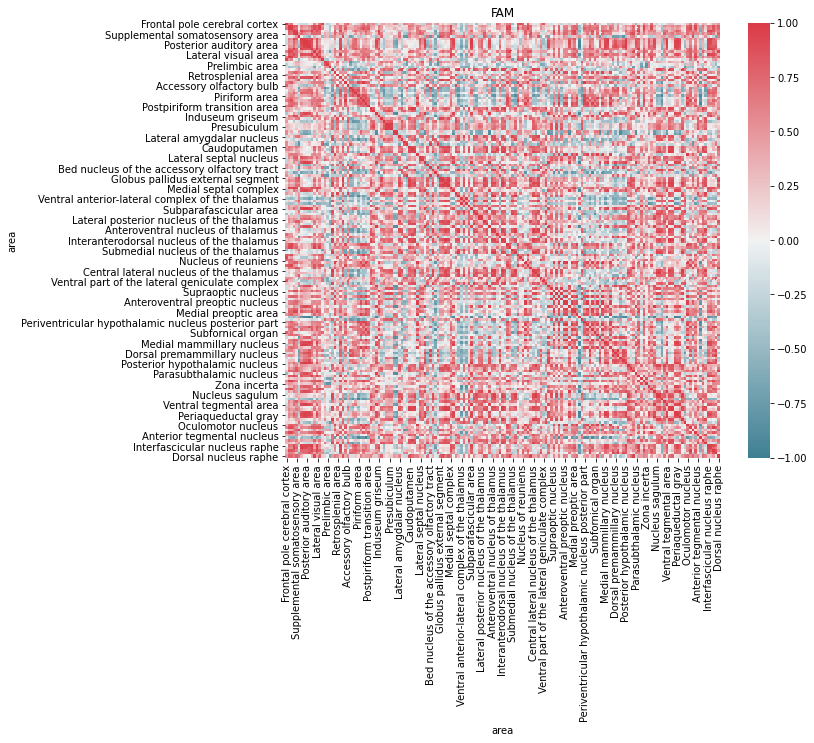

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

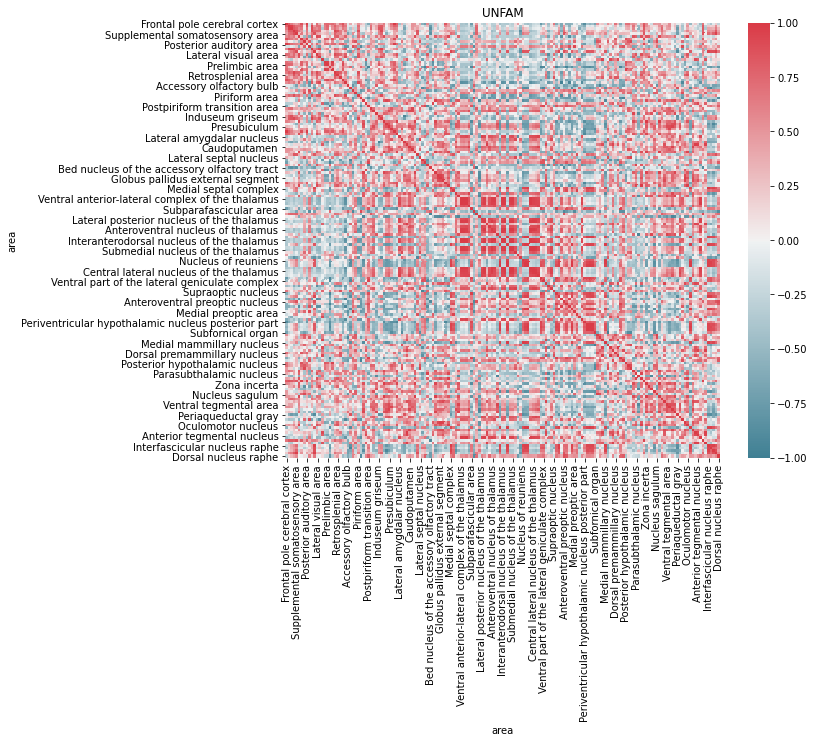

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')